In [294]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Загрузка данных 

In [295]:
## Загрузка данных


path_train = '/Users/vasevooo/projects/house_prices/housing_kaggle/data/train.csv'
path_test = '/Users/vasevooo/projects/house_prices/housing_kaggle/data/test.csv'

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

df_train.head()
df_train.shape


(1460, 81)

In [296]:
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [297]:
## Объединение df_train and df_test, взял натуральный логарифм таргета

df = pd.concat([df_train.drop('SalePrice', axis=1), df_test], axis=0)
df.reset_index(inplace=True, drop=True)
y = np.log(df_train['SalePrice'])
df.head(5)

ind_train = df_train.shape[0]
ind_test = df_test.shape[0]

ind_train, ind_test


(1460, 1459)

In [298]:
df.shape
# df.info()

(2919, 80)

In [299]:
df['LotFrontage'].value_counts()
# df['MasVnrArea'].value_counts()
# df['GarageYrBlt'].value_counts()

df['LotFrontage'].isna().sum()/len(df['LotFrontage'])

0.16649537512846865

In [300]:
df['LotFrontage'].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

## Basic EDA

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/var/folders/fx/mm163gs50sg284cn4dbq0dlh0000gn/T/ipykernel_89904/1255858044.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


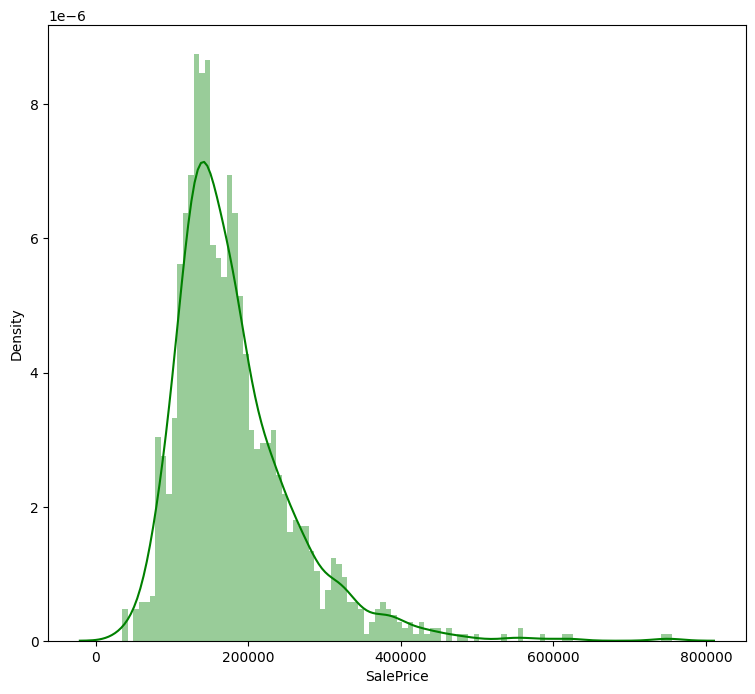

In [301]:
print(df_train['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [302]:
list(set(df_train.dtypes.tolist()))
df_num = df_train.select_dtypes(include = ['float64', 'int64']).drop('Id', axis=1)
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


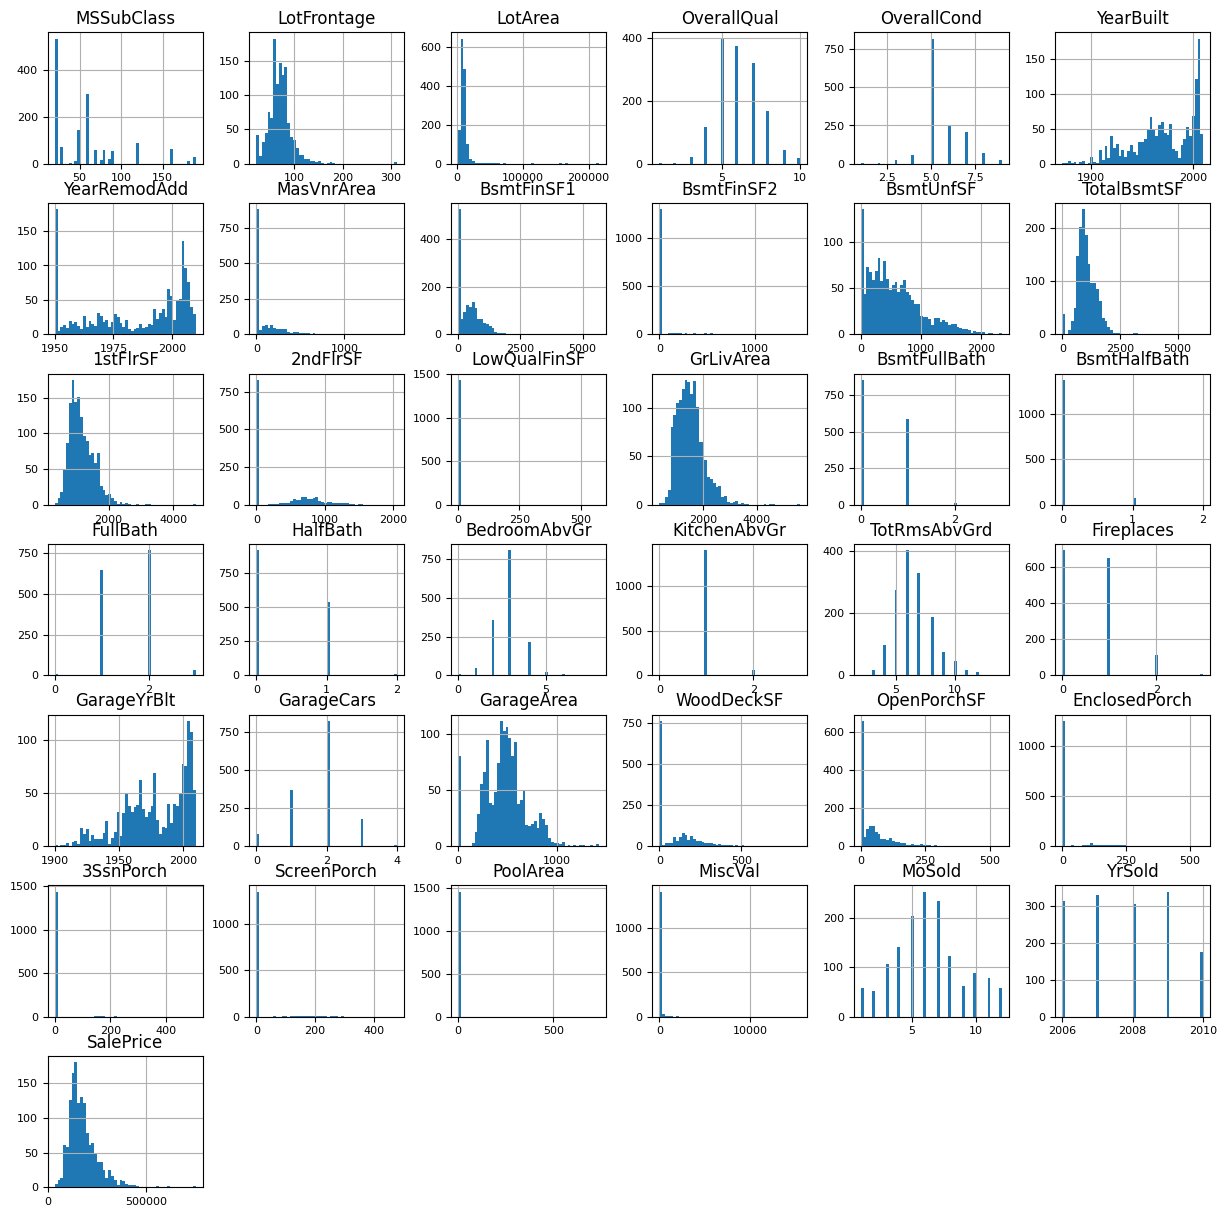

In [303]:
df_num.hist(figsize=(15, 15), bins=50, xlabelsize=8, ylabelsize=8);

In [304]:
missing_values = pd.DataFrame(df.isnull().mean().round(4).mul(100).sort_values(ascending=False))
missing_values.head(15)

,0
PoolQC,99.66
MiscFeature,96.40
Alley,93.22
Fence,80.44
MasVnrType,60.50
FireplaceQu,48.65
LotFrontage,16.65
GarageQual,5.45
GarageCond,5.45
GarageYrBlt,5.45


## Обработка категориальных фичей
Вася

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [306]:
df_cat = df.select_dtypes(include = ['object'])
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [307]:
## missing values in cat feautures

missing_values_cat = pd.DataFrame(df_cat.isnull().mean().round(4).mul(100).sort_values(ascending=False))
missing_values_cat.head(15)


## Заполнил все NaN 'Lack_F', так как в данном случае NaN у нас - это не пустое поле, а отсутствие признака
df_cat.fillna('Lack_F', inplace=True)

In [308]:
df_cat.nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      17
Exterior1st      16
SaleType         10
Condition1        9
Condition2        8
RoofMatl          8
Functional        8
HouseStyle        8
BsmtFinType2      7
BsmtFinType1      7
GarageType        7
Electrical        6
Foundation        6
Heating           6
FireplaceQu       6
GarageQual        6
GarageCond        6
MSZoning          6
SaleCondition     6
RoofStyle         6
ExterCond         5
BldgType          5
MiscFeature       5
Fence             5
LotConfig         5
KitchenQual       5
BsmtQual          5
HeatingQC         5
BsmtExposure      5
BsmtCond          5
MasVnrType        4
ExterQual         4
GarageFinish      4
LandContour       4
LotShape          4
PoolQC            4
Utilities         3
PavedDrive        3
Alley             3
LandSlope         3
CentralAir        2
Street            2
dtype: int64

In [309]:
selected_columns = df_cat.loc[:, df_cat.nunique() >= 5]

# Хочу заменить значения на 'other' у колонок с выбранным threshold. Далее можно будет подумать над выбором значения и подбирать для каждой колонки.
thresholds = selected_columns.apply(lambda x: x.count() * 0.0)

## итерируюсь по колонкам и заменяю значения меньше threshold на 'other'

for column, threshold in zip(selected_columns.columns, thresholds):
    counts = selected_columns[column].value_counts()
    to_replace = counts[counts < threshold].index
    selected_columns[column] = selected_columns[column].replace(to_replace, 'other')


## вставляем отобранные колонки в df_cat

df_cat[selected_columns.columns] = selected_columns


/var/folders/fx/mm163gs50sg284cn4dbq0dlh0000gn/T/ipykernel_89904/562608944.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[column] = selected_columns[column].replace(to_replace, 'other')
/var/folders/fx/mm163gs50sg284cn4dbq0dlh0000gn/T/ipykernel_89904/562608944.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[column] = selected_columns[column].replace(to_replace, 'other')
/var/folders/fx/mm163gs50sg284cn4dbq0dlh0000gn/T/ipykernel_89904/562608944.py:11: SettingWithC

In [310]:
df_cat.nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      17
Exterior1st      16
SaleType         10
Condition1        9
Condition2        8
RoofMatl          8
Functional        8
HouseStyle        8
BsmtFinType2      7
BsmtFinType1      7
GarageType        7
Electrical        6
Foundation        6
Heating           6
FireplaceQu       6
GarageQual        6
GarageCond        6
MSZoning          6
SaleCondition     6
RoofStyle         6
ExterCond         5
BldgType          5
MiscFeature       5
Fence             5
LotConfig         5
KitchenQual       5
BsmtQual          5
HeatingQC         5
BsmtExposure      5
BsmtCond          5
MasVnrType        4
ExterQual         4
GarageFinish      4
LandContour       4
LotShape          4
PoolQC            4
Utilities         3
PavedDrive        3
Alley             3
LandSlope         3
CentralAir        2
Street            2
dtype: int64

In [311]:
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Lack_F,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Lack_F,Lack_F,Lack_F,WD,Normal
1,RL,Pave,Lack_F,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Lack_F,Lack_F,Lack_F,WD,Normal
2,RL,Pave,Lack_F,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Lack_F,Lack_F,Lack_F,WD,Normal
3,RL,Pave,Lack_F,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Lack_F,Lack_F,Lack_F,WD,Abnorml
4,RL,Pave,Lack_F,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Lack_F,Lack_F,Lack_F,WD,Normal


In [312]:
## Попробую использовать target encoder для всех фичей

from category_encoders import TargetEncoder
te = TargetEncoder()

## Обучаем target encoding
te.fit(df_cat.loc[0:ind_test,:], y)

## Собираем df с target encoding
df_cat_te = pd.concat([te.transform(df_cat.loc[0:ind_test,:]), te.transform(te.transform(df_cat.loc[ind_train:,:]))], axis=0)


df_cat_te.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,12.027165,12.024639,12.024378,12.023146,12.023723,12.024108,12.023840,12.023721,12.024243,12.023091,...,12.025655,12.024084,12.024154,12.025981,12.024790,12.023226,12.024790,12.024449,12.025056,12.025457
std,0.105074,0.003311,0.044805,0.081549,0.043542,0.000470,0.042667,0.008485,0.193253,0.050890,...,0.161285,0.174253,0.102613,0.101436,0.084236,0.003784,0.055988,0.019754,0.094274,0.098976
min,11.692893,11.953506,11.689986,11.936094,11.813595,11.998983,12.001900,12.020565,11.536040,11.757933,...,11.493065,11.493065,11.493065,11.493065,11.578347,12.022115,11.791978,11.876505,11.845353,11.788846
25%,12.024051,12.024051,12.024051,11.936094,12.022694,12.024051,12.001900,12.020565,12.024051,12.024051,...,12.024051,12.024051,12.024051,12.024051,12.024051,12.022115,12.024051,12.024051,11.991061,12.005034
50%,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,...,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051
75%,12.085885,12.025522,12.037675,12.024051,12.024051,12.024183,12.024051,12.024051,12.085912,12.042916,...,12.160778,12.172672,12.068539,12.070483,12.059895,12.024051,12.058599,12.030112,12.024051,12.024051
max,12.244171,12.025522,12.037675,12.286332,12.248102,12.024183,12.249672,12.076286,12.617426,12.125676,...,12.374528,12.320811,12.093508,12.070483,12.059895,12.154581,12.058599,12.076766,12.459356,12.447465


In [313]:
## Заменяем в нашем df категориальные фичи на фичи, которые прошли encoding

df[df_cat_te.columns] = df_cat_te

In [314]:
df.shape

(2919, 80)

In [315]:
df.describe().round(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,2919.00,2919.00,2919.00,2433.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,...,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00
mean,1460.00,57.14,12.03,69.31,10168.11,12.02,12.02,12.02,12.02,12.02,...,16.06,2.25,12.02,12.02,12.02,50.83,6.21,2007.79,12.03,12.03
std,842.79,42.52,0.11,23.34,7887.00,0.00,0.04,0.08,0.04,0.00,...,56.18,35.66,0.00,0.06,0.02,567.40,2.71,1.31,0.09,0.10
min,1.00,20.00,11.69,21.00,1300.00,11.95,11.69,11.94,11.81,12.00,...,0.00,0.00,12.02,11.79,11.88,0.00,1.00,2006.00,11.85,11.79
25%,730.50,20.00,12.02,59.00,7478.00,12.02,12.02,11.94,12.02,12.02,...,0.00,0.00,12.02,12.02,12.02,0.00,4.00,2007.00,11.99,12.01
50%,1460.00,50.00,12.02,68.00,9453.00,12.02,12.02,12.02,12.02,12.02,...,0.00,0.00,12.02,12.02,12.02,0.00,6.00,2008.00,12.02,12.02
75%,2189.50,70.00,12.09,80.00,11570.00,12.03,12.04,12.02,12.02,12.02,...,0.00,0.00,12.02,12.06,12.03,0.00,8.00,2009.00,12.02,12.02
max,2919.00,190.00,12.24,313.00,215245.00,12.03,12.04,12.29,12.25,12.02,...,576.00,800.00,12.15,12.06,12.08,17000.00,12.00,2010.00,12.46,12.45


## Обработка числовых фичей 
Вика

In [316]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

df.shape

(2919, 80)

In [317]:
# df['LotFrontage'].value_counts()
# df['MasVnrArea'].value_counts()
# df['GarageYrBlt'].value_counts()

In [318]:
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0)
df['GarageCars'] = df['GarageCars'].fillna(0)
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)

In [319]:
df['BsmtHalfBath'].value_counts()

BsmtHalfBath
0.0    2744
1.0     171
2.0       4
Name: count, dtype: int64

## Подготовка к обучению модели

In [320]:
## Scaling of our data

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_scaled = pd.DataFrame(ss.fit_transform(df.loc[:, df.columns != 'Id']), columns=df.columns[1:])
df_scaled.describe().round(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,...,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,...,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.87,-3.18,-2.27,-1.12,-21.48,-7.46,-1.07,-4.83,-53.48,-0.51,...,-0.29,-0.06,-0.29,-4.16,-7.49,-0.09,-1.92,-1.36,-1.91,-2.39
25%,-0.87,-0.03,-0.44,-0.34,-0.18,-0.01,-1.07,-0.02,-0.12,-0.51,...,-0.29,-0.06,-0.29,-0.01,-0.02,-0.09,-0.82,-0.60,-0.36,-0.21
50%,-0.17,-0.03,0.00,-0.09,-0.18,-0.01,0.01,0.01,-0.12,0.00,...,-0.29,-0.06,0.22,-0.01,-0.02,-0.09,-0.08,0.16,-0.01,-0.01
75%,0.30,0.56,0.41,0.18,0.27,0.30,0.01,0.01,0.16,0.00,...,-0.29,-0.06,0.22,0.60,0.29,-0.09,0.66,0.92,-0.01,-0.01
max,3.13,2.07,11.44,26.01,0.27,0.30,3.23,5.15,0.16,5.29,...,9.97,22.37,34.71,0.60,2.65,29.88,2.13,1.68,4.61,4.26


In [321]:
## если скейэлить только numeric

# df_numeric_scaled = pd.DataFrame(ss.fit_transform(df[df_num.drop('SalePrice', axis=1).columns]), 
#                                  columns = df_num.drop('SalePrice', axis=1).columns)

# df_scaled = pd.concat([df_numeric_scaled,df_cat_te], axis=1)

# df_scaled


In [322]:
### Разбиваем наш df на train and test

df_train = df_scaled.loc[0:ind_test,:] 
df_test = pd.concat([df['Id'][ind_train:], df_scaled.loc[ind_train:,:]], axis=1)

df_train.shape, df_test.shape

# df_test.head(5)


((1460, 79), (1459, 80))

In [323]:
from sklearn.model_selection import train_test_split

x = df_train

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

In [324]:
x_train.shape,  y_train.shape, x_valid.shape, y_valid.shape

((1168, 79), (1168,), (292, 79), (292,))

## Обучение модели

In [325]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [326]:
rf = RandomForestRegressor()
lr = LinearRegression()

In [327]:
rf.fit(x_train, y_train)
lr.fit(x_train, y_train)

LinearRegression()

In [328]:
from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(y_valid, lr.predict(x_valid), squared=False)
mse_rf = mean_squared_error(y_valid, rf.predict(x_valid), squared=False)

mse_rf.round(3), mse_lr.round(3)


print("train acc lr:", mean_squared_error(y_train, lr.predict(x_train), squared=False))
print("valid acc lr:", mean_squared_error(y_valid, lr.predict(x_valid), squared=False))

print("train acc rf:", mean_squared_error(y_train, rf.predict(x_train), squared=False))
print("valid acc rf:", mean_squared_error(y_valid, rf.predict(x_valid), squared=False))

train acc lr: 0.12329508839038822
valid acc lr: 0.13893167168583961
train acc rf: 0.05354889190197569
valid acc rf: 0.14574919546703777


In [329]:
y_pred_test = lr.predict(df_test.drop(['Id'], axis=1))

y_pred_test = np.exp(y_pred_test)

In [330]:
# submission_lr = pd.DataFrame({'Id':df_test['Id'], 'SalePrice': y_pred_test})
# submission_lr.to_csv('/Users/vasevooo/projects/house_prices/housing_kaggle/data/submission_lr.csv', index=False)

In [331]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor(verbose = False, iterations = 50, l2_leaf_reg=3, learning_rate = 0.1, depth = 3, loss_function = 'RMSE')

cb.fit(x_train, y_train.ravel())


In [332]:
print("train acc:", mean_squared_error(y_train, cb.predict(x_train), squared=False))
print("valid acc:", mean_squared_error(y_valid, cb.predict(x_valid), squared=False))

train acc: 0.1290448834256058
valid acc: 0.15117215086776775


In [333]:
y_pred_test = cb.predict(df_test.drop(['Id'], axis=1))

y_pred_test = np.exp(y_pred_test)

In [334]:
submission_cb = pd.DataFrame({'Id':df_test['Id'], 'SalePrice': y_pred_test})
# submission_cb.to_csv('/Users/vasevooo/projects/house_prices/housing_kaggle/data/submission_cb.csv', index=False)

## Grid Search of Hyperparameters

In [335]:
from catboost import CatBoostRegressor, Pool


In [336]:
# cb_2 = CatBoostRegressor(verbose = False)

# grid = {'learning_rate': [0.01, 0.03, 0.1, 0.3],
#         'depth': [4, 6], 
#         'iterations': [100, 500],
#         'l2_leaf_reg': [1, 3],
#         'border_count': [32, 64]}

# grid_search_result = cb_2.grid_search(grid,
#                                        X=x_train,
#                                        y=y_train,
#                                        plot=True)

## Feature selection

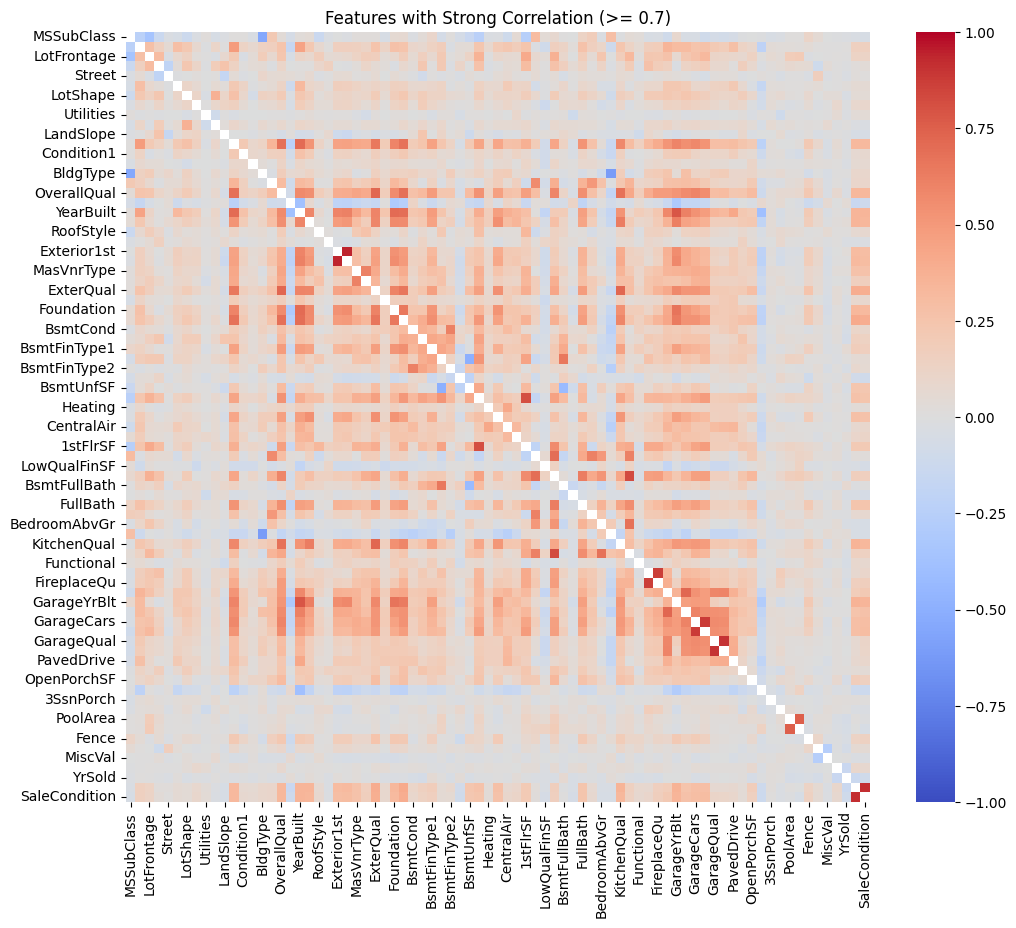

In [337]:
corr_matrix = df_train.corr()

# Filter the correlation matrix based on a threshold, e.g., 0.7
threshold = 0
strong_corr = corr_matrix[(np.abs(corr_matrix) >= threshold) & (np.abs(corr_matrix) != 1)]

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(strong_corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Features with Strong Correlation (>= 0.7)")
plt.show()

In [338]:
corr_matrix

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
MSSubClass,1.000000,-0.231056,-0.356828,-0.139781,-0.024969,-0.049369,-0.117358,-0.026108,0.022844,-0.051804,...,-0.026030,0.008283,0.008999,0.115348,0.047032,-0.007683,-0.013585,-0.021407,-0.037595,-0.047872
MSZoning,-0.231056,1.000000,0.274003,0.150836,0.048327,0.281285,0.222236,0.070472,-0.009805,0.102927,...,0.026255,0.025726,0.020564,0.043271,0.011246,0.002146,0.002714,0.015124,0.152863,0.151476
LotFrontage,-0.356828,0.274003,1.000000,0.305194,-0.037343,0.082805,0.146792,0.024335,0.000728,-0.028037,...,0.037665,0.180839,0.196987,-0.020942,-0.005554,0.000159,0.010366,0.006494,0.126571,0.120805
LotArea,-0.139781,0.150836,0.305194,1.000000,-0.197131,0.037533,0.228388,0.113874,-0.010123,0.187235,...,0.043160,0.077672,0.059508,0.049406,-0.106299,0.038068,0.001205,-0.014261,0.022429,0.032199
Street,-0.024969,0.048327,-0.037343,-0.197131,1.000000,-0.013155,-0.005640,0.020130,-0.001682,0.014073,...,-0.033160,0.004413,0.003527,-0.026842,0.164588,-0.022733,0.003690,-0.025043,0.019257,0.011167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,-0.007683,0.002146,0.000159,0.038068,-0.022733,-0.004027,0.036725,0.006244,0.002296,0.068516,...,0.031946,0.029669,0.014494,-0.021169,-0.260298,1.000000,-0.006495,0.004906,-0.024255,-0.015865
MoSold,-0.013585,0.002714,0.010366,0.001205,0.003690,0.006459,0.031606,0.078606,0.051552,-0.013265,...,0.023217,-0.033737,-0.029094,-0.010363,-0.012835,-0.006495,1.000000,-0.145721,0.090653,0.075157
YrSold,-0.021407,0.015124,0.006494,-0.014261,-0.025043,0.022191,-0.033508,-0.009852,-0.023353,0.009500,...,0.010694,-0.059689,-0.051382,-0.038219,-0.067411,0.004906,-0.145721,1.000000,-0.138070,-0.098461
SaleType,-0.037595,0.152863,0.126571,0.022429,0.019257,0.049577,0.042349,0.079714,0.035499,-0.020017,...,-0.024133,0.010724,-0.002027,0.128726,0.058164,-0.024255,0.090653,-0.138070,1.000000,0.914876


In [339]:
df_scaled.describe().round(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,...,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,...,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.87,-3.18,-2.27,-1.12,-21.48,-7.46,-1.07,-4.83,-53.48,-0.51,...,-0.29,-0.06,-0.29,-4.16,-7.49,-0.09,-1.92,-1.36,-1.91,-2.39
25%,-0.87,-0.03,-0.44,-0.34,-0.18,-0.01,-1.07,-0.02,-0.12,-0.51,...,-0.29,-0.06,-0.29,-0.01,-0.02,-0.09,-0.82,-0.60,-0.36,-0.21
50%,-0.17,-0.03,0.00,-0.09,-0.18,-0.01,0.01,0.01,-0.12,0.00,...,-0.29,-0.06,0.22,-0.01,-0.02,-0.09,-0.08,0.16,-0.01,-0.01
75%,0.30,0.56,0.41,0.18,0.27,0.30,0.01,0.01,0.16,0.00,...,-0.29,-0.06,0.22,0.60,0.29,-0.09,0.66,0.92,-0.01,-0.01
max,3.13,2.07,11.44,26.01,0.27,0.30,3.23,5.15,0.16,5.29,...,9.97,22.37,34.71,0.60,2.65,29.88,2.13,1.68,4.61,4.26


In [361]:
## Отбор фичей catboost 

# df_train['random'] = np.random.uniform(0,100, size=df_train.shape[0])

cb.fit(x_train, y_train)

importances = pd.Series(dict(zip(df_train.columns, cb.feature_importances_))) \
  .sort_values(key=lambda x: abs(x), ascending=False) \
  .round(5)


# importances.head(20)
importances.value_counts().sort_index(ascending=False)


22.40140     1
21.42922     1
10.16298     1
8.49924      1
4.39494      1
3.79320      1
3.22081      1
2.97648      1
2.46655      1
2.21715      1
2.00143      1
1.87796      1
1.84406      1
1.78779      1
1.67874      1
1.33166      1
1.07289      1
0.88682      1
0.79789      1
0.74619      1
0.68320      1
0.46702      1
0.45903      1
0.36225      1
0.32963      1
0.29527      1
0.28138      1
0.25900      1
0.16504      1
0.14824      1
0.14372      1
0.14368      1
0.11973      1
0.09548      1
0.09529      1
0.08001      1
0.07639      1
0.07010      1
0.05700      1
0.03630      1
0.03498      1
0.00984      1
0.00000     37
Name: count, dtype: int64

In [379]:
## Отбираем колонки, которые имеют значимость меньше порогового значения

# Set the threshold value
threshold = 0.5

mask = (importances.abs() < threshold)

columns_to_drop = importances.index[mask]

df_filtered_train = x_train.drop(columns_to_drop, axis=1)
df_filtered_valid = x_valid.drop(columns_to_drop, axis=1)


df_filtered_train.shape, y_train.shape, df_filtered_valid.shape, y_valid.shape


((1168, 21), (1168,), (292, 21), (292,))

In [380]:
## Тренируем CB на отфильрованном дата фрейме


cb.fit(df_filtered_train, y_train)

In [381]:
print("train acc:", mean_squared_error(y_train, cb.predict(df_filtered_train), squared=False))
print("valid acc:", mean_squared_error(y_valid, cb.predict(df_filtered_valid), squared=False))

train acc: 0.1294217034294512
valid acc: 0.152356835928829


In [ ]:
train acc: 0.1290448834256058
valid acc: 0.15117215086776775